# Entrega 4

**Autor**: Sergio Rodríguez Calvo

In [63]:
from IPython.display import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Ejercicio 1. Clasificación de texturas

Para este primer ejercicio hemos elegido 6 imágenes en dos grupos, para imagenes con texturas de ladrillos y para imagenes con textures de césped, respectivamente.

In [64]:
brick1_img = cv.imread('ex1/brick/1.tiff',0)
brick2_img = cv.imread('ex1/brick/2.tiff',0)
brick3_img = cv.imread('ex1/brick/3.tiff',0)
grass1_img = cv.imread('ex1/grass/1.tiff',0)
grass2_img = cv.imread('ex1/grass/2.tiff',0)
grass3_img = cv.imread('ex1/grass/3.tiff',0)

imgs = [brick1_img[100:300, 100:300],brick2_img[100:300, 100:300],brick3_img[100:300, 100:300],grass1_img[100:300, 100:300],grass2_img[100:300, 100:300],grass3_img[100:300, 100:300]]

Hemos cargado un array de imagenes `imgs` donde seleccionamos una región de 200x200 píxeles más o menos centrada, para evitar los bordes negros que pueden aparecer en dichas imagenes y que pueden alterar los resultados.

Vamos a mostrar las imagenes seleccionadas:

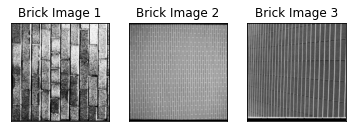

In [65]:
plt.subplot(131),plt.imshow(brick1_img, cmap = 'gray')
plt.title('Brick Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(brick2_img, cmap = 'gray')
plt.title('Brick Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(brick3_img, cmap = 'gray')
plt.title('Brick Image 3'), plt.xticks([]), plt.yticks([])
plt.show()

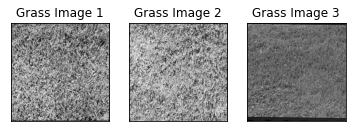

In [66]:
plt.subplot(131),plt.imshow(grass1_img, cmap = 'gray')
plt.title('Grass Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(grass2_img, cmap = 'gray')
plt.title('Grass Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(grass3_img, cmap = 'gray')
plt.title('Grass Image 3'), plt.xticks([]), plt.yticks([])
plt.show()

Vamos a mostrar las regiones centrales eledigas para hacernos una idea de cómo es la imagen con la que vamos a trabajar:

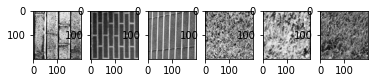

In [67]:
plt.subplot(161),plt.imshow(imgs[0], cmap = 'gray')
plt.subplot(162),plt.imshow(imgs[1], cmap = 'gray')
plt.subplot(163),plt.imshow(imgs[2], cmap = 'gray')
plt.subplot(164),plt.imshow(imgs[3], cmap = 'gray')
plt.subplot(165),plt.imshow(imgs[4], cmap = 'gray')
plt.subplot(166),plt.imshow(imgs[5], cmap = 'gray')
plt.show()

En este caso, estamos trabajando con descriptores globales, los cuales obtienen características que describen una imagen, y en el caso concreto de los estadísticos (los que vamos a utilizar en este ejercicio), están basados en los niveles de gris de la imagen aunque, eventualmente, también pueden estar basados en las coordenadas de los píxeles. Están enfocadas en el análisis de texturas. 

Vamos a obtener todas las medidas estadísticas vistas en teoría, definiendo todas las funciones necesarias (se dejan comentarios aclaratorios donde sea pertinente):

In [68]:
# Calculamos el promedio, necesario en la función del momento central de orden n
def avg(img):
    hist,_ = np.histogram(img.ravel(),256,[0,255])
    acc = 0
    for zi in range(256):
        p_zi = hist[zi] / (img.shape[0] * img.shape[1])
        acc += zi * p_zi 

    return acc, hist

# Calculamos el momento central de orden n, por defecto, a orden 2, que coincide con la varianza
def cental_moment_n_order(img, order = 2):
    acc = 0
    m, hist = avg(img)
    
    for zi in range(256):
        p_zi = hist[zi] / (img.shape[0] * img.shape[1])
        acc += ((zi - m) ** order) * p_zi

    return acc

# Calculamos la uniformidad
def uniformity(img):
    hist,_ = np.histogram(img.ravel(),256,[0,255])
    acc = 0

    for zi in range(256):
        p_zi = hist[zi] / (img.shape[0] * img.shape[1])
        acc += p_zi ** 2

    return acc

import math

# Calculamos la entropía
def entropy(img):
    hist,_ = np.histogram(img.ravel(),256,[0,255])
    acc = 0

    for zi in range(256):
        p_zi = hist[zi] / (img.shape[0] * img.shape[1])
        if p_zi > 0:
            acc += p_zi * math.log(p_zi,2)

    return -acc

Para calcular la probabilidad `p_zi`, tenemos en cuenta el número de ocurrencias de un determinado nivel de gris `zi` entre el número total de píxeles de la imagen `img.shape[0] * img.shape[1]`

Una vez definidas las funciones, vamos a obtener todos los descriptores estádisticos vistos en teoría:

In [69]:
def statistical_descriptors(images):
    res = []
    for img in images:
        img_descriptors = []

        meanstd = cv.meanStdDev(img)

        # Mean
        img_descriptors.append(meanstd[0][0][0])

        # Std
        std = meanstd[1][0][0]
        img_descriptors.append(std) # Desviación típica

        # Var
        var = std**2
        #img_descriptors.append(var) # Varianza

        # R (normalized)
        img_descriptors.append(1 - (1 / (1 + (var / 255**2) ))) # Suavidad, con la varianza normalizada con (L-1)^2, siendo L el nivel máximo de gris de la imagen

        # Third moment
        img_descriptors.append(cental_moment_n_order(img, order=3)) # Sesgo o asimetría

        # Uniformity
        img_descriptors.append(uniformity(img)) # Homogeneidad

        # Entropy
        img_descriptors.append(entropy(img)) # Medida de aleatoriedad

        res.append(img_descriptors)

    return res


Vamos a convertir la lista de listas obtenida en un array de Numpy y, a continuación, vamos a crear un _dataframe_ de Pandas para mostrar la información.

In [70]:
res = statistical_descriptors(imgs)
array = np.array(res)
import pandas as pd
df = pd.DataFrame(array, columns=['Mean', 'Std', 'R (normalized)', 'Third Moment', 'Uniformity', 'Entropy'])
df

,Mean,Std,R (normalized),Third Moment,Uniformity,Entropy
0,145.150575,71.801398,0.073460,-145742.378490,0.014175,6.424690
1,123.576450,18.161126,0.005047,4875.798032,0.020006,5.938483
2,104.979250,38.406728,0.022182,67508.439988,0.013923,6.597112
3,129.713875,51.614907,0.039358,-39198.626366,0.005403,7.640395
4,177.511600,41.890154,0.026277,-47943.864268,0.007264,7.291291
5,98.115975,27.877532,0.011811,3238.134544,0.009941,6.827295


Las 3 primeras entradas del dataframe se corresponden con los descriptores estadísticos para la textura de tipo ladrillo (brick) y, los 3 últimos, para la textura de tipo césped (grass).

En base a los resultados, vamos a comentar cada descriptor:
* Media: es el más simple de todos, con el que obtenemos el nivel medio de gris de la imagen o región. En este caso, no es un buen descriptor, porque vemos que entre las diferentes texturas hay solape (medias en el rango 104-145 para la textura de tipo ladrillo y tango 98-177 para la textura de tipo césped).
* Desviación típica: es más informativa que la media y depende de la variabilidad de los niveles de gris. Entre ambas texturas no hay grandes diferencias en cuanto a homogeneidad, por lo que no es un buen descriptor. Además, hay solape entre los rangos de ambas texturas.
* Suavidad (R): mide lo mismo que la desviación típica, por lo que no hay mucho que comentar aquí.
* Momento de orden tres: mide la asimetría o el sesgo del histograma, según lo obtenido no obtenemos un resultado concluyente en cuanto a distinguir texturas.
* Uniformidad: obtenemos cómo de uniforme es una textura, en este caso, si vemos diferencias entre ambas texturas, ya que está la textura de tipo ladrillo en un orden de magnitud mayor que la textura de tipo cesped. Esto tiene sentido puesto que una imagen de textura de tipo ladrillo es más uniforme que la textura de tipo césped.
* Entropía: mide la aleatoriedad de los niveles de gris, por lo que estamos en un caso parecido a la uniformidad. Vemos como se definen dos rangos separables, siendo el rango de la textura de tipo ladrillo 5.9-6.59 y el rango para la textura de tipo césped 6.8-7.6. Tiene sentido puesto que la textura de tipo césped tendrá más aleatoriedad.

Se puede diseñar un método de clasificación sencillo utilizando k-NN, o algoritmo de vecino más cercano, de forma que se defina un centroide en función de las instancias ya clasificadas y, utilizando un descriptor que funcione bien (por ejemplo, la entropçia o la uniformidad), clasificar según la cercanía al centroide que representa cada clase (textura).

Se podría utilizar también un árbol de decisión, de forma que se obtiene el umbral a partir del cual una imagen se clasifica como de una clase o de otra. En este caso, un árbol de decisión sí es un modelo de aprendizaje automático propiamente dicho, ya que K-NN es en realidad un algoritmo.

## Ejercicio 2. Descriptores geométricos 

Vamos a cargar las imagenes obtenidas de internet:

In [71]:
img1 = cv.imread("ex2/pelota/1.jpeg")
img2 = cv.imread("ex2/pelota/2.jpeg")
img3 = cv.imread("ex2/pelota/3.webp")
img4 = cv.imread("ex2/rubik/1.jpg")
img5 = cv.imread("ex2/rubik/2.jpeg")
img6 = cv.imread("ex2/rubik/3.jpeg")

imgs = [img1, img2, img3, img4, img5, img6]

Vamos a mostrar las imagenes de 3 en 3, primero las pelotas y, depués, los cubos de rubik.

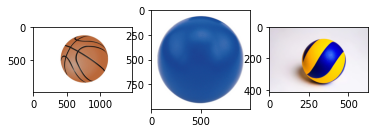

In [72]:
plt.subplot(131),plt.imshow(img1[:,:,::-1])
plt.subplot(132),plt.imshow(img2[:,:,::-1])
plt.subplot(133),plt.imshow(img3[:,:,::-1])
plt.show()

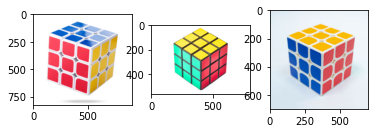

In [73]:
plt.subplot(131),plt.imshow(img4[:,:,::-1])
plt.subplot(132),plt.imshow(img5[:,:,::-1])
plt.subplot(133),plt.imshow(img6[:,:,::-1])
plt.show()

Vamos a convertir las imagenes en escala de grises:

In [74]:
gray_imgs = []
for img in imgs:
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_imgs.append(gray_img)

In [75]:
compactities = []
for gray_img in gray_imgs:
    thresh = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
    contours,hierarchy = cv.findContours(thresh, 1, 2)
    cnt = contours[0]
    M = cv.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    area = cv.contourArea(cnt)
    perimeter = cv.arcLength(cnt,True)

    compactness = (perimeter ** 2) / area
    compactities.append(compactness)

In [76]:
for i in range(len(compactities)):
    print("La compacidad para la imagen {} es {:.2f}".format(i, compactities[i]))

La compacidad para la imagen 0 es 15.54
La compacidad para la imagen 1 es 14.66
La compacidad para la imagen 2 es 16.00
La compacidad para la imagen 3 es 16.00
La compacidad para la imagen 4 es 16.00
La compacidad para la imagen 5 es 15.54


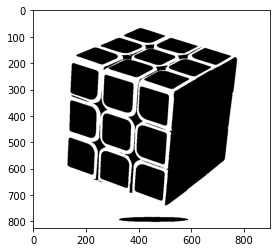

In [77]:
blur = cv.blur(gray_imgs[3], (3, 3)) # blur the image
ret, thresh = cv.threshold(blur, 220, 255, cv.THRESH_BINARY)
plt.imshow(thresh, cmap = 'gray')

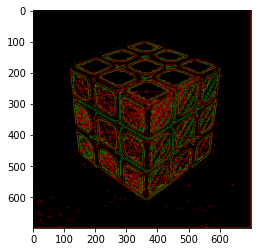

In [78]:
blur = cv.blur(gray_imgs[0], (3, 3)) # blur the image
thresh = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# create hull array for convex hull points
hull = []

# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv.convexHull(contours[i], False))

drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

# draw contours and hull points
for i in range(len(contours)):
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull

    # draw ith contour
    cv.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object
    cv.drawContours(drawing, hull, i, color, 1, 8)

plt.imshow(drawing, cmap = 'gray')

In [79]:
result = []
for gray_img in gray_imgs:
    blur = cv.blur(gray_img, (3, 3)) # blur the image
    thresh = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # create hull array for convex hull points
    hull = []

    # calculate points for each contour
    for i in range(len(contours)):
        # creating convex hull object for each contour
        hull.append(cv.convexHull(contours[i], False))

    drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

    # draw contours and hull points
    for i in range(len(contours)):
        color_contours = (0, 255, 0) # green - color for contours
        color = (255, 0, 0) # blue - color for convex hull

        # draw ith contour
        cv.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
        # draw ith convex hull object
        cv.drawContours(drawing, hull, i, color, 1, 8)

        
    result.append(drawing)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
plt.subplot(131),plt.imshow(result[0], cmap = 'gray')
plt.subplot(132),plt.imshow(result[1], cmap = 'gray')
plt.subplot(133),plt.imshow(result[2], cmap = 'gray')
plt.show()

## Ejercicio 3. Descriptores locales. Harris corners, SIFT y ORB

### Harris 

En 1988, en la revista _Alvey Vision Conference. Vol. 15._, Chris Harris y Mike Stephens publican [_A Combined Corner and Edge Detector_](http://www.bmva.org/bmvc/1988/avc-88-023.pdf). Se trata de un artículo donde se describe un nuevo método para obtener descriptores locales en visión por ordenador. Como hemos visto, un punto de interes es una región de la imagen que es fácilemente indentificable porque tienen un entorno con muchas variaciones.

El método de Harris es una mejora del detector de esquinas de Moravec. Las esquinas son puntos que presentan cambios o variabilidad en cualquier dirección de movimiento, siendo este un punto fácilmente identificable de la imagen. Harris y Stephens plantean una forma de detectar las esquinas desde un punto de vista matemático.

En este método tenemos una ventana centrada en un punto (x0,y0) y que vamos a trasladar en todas las direcciones según un vector (u,v) para maximizar una función. La expresión matemática tiene la siguiente forma:

In [ ]:
Image(filename='ex3/Harris_corner.png') 

La expresión anterior tiene los parámetros (u,v), que es el vector que indica la traslacción que vamos a realizar. Por tanto, para todos los puntos de la ventana, vamos a multiplicar una función de pesos, con la que damos más importancia a unos puntos que a otro dentro de la ventana, con la diferencia al cuadrado de las intensidades del nuevo punto tras realizar la translacción respecto del punto original.

La función de pesos puede ser, por ejemplo, una función gaussiana, dando más pesos a los más cercanos. O, también, se puede dar la misma importancia a todos los puntos de la ventana.

La idea es realizar esta función para una serie de valores (u,v), que van a determinar el tamañom de la ventana. De esta forma, obtenemos una nueva imagen _E(u,v)_ donde el pixel central siempre va a ser 0, porque la diferencia entre ambos es 0. Esta imagen nos va a dar información en cuanto qué pasa en cuanto a variaciones de intensidad en distintas direcciones.

Lo que buscamos es máximizar la diferencia en las intensidades, para ello, se utiliza el desarrollo de Taylor para llegar a una expresión diferente. Esa expresión, se puede reescribir algebráicamente y, añadiendo los pesos, obtenemos la siguiente expresión:

In [ ]:
Image(filename='ex3/Harris_alg_exp.png') 

`M` es una matriz con las derivadas discretas de la imagen.

Con ello, Harris y Stephens, definieron una ecuación con la que detectar esquinas:

In [ ]:
Image(filename='ex3/Harris_R.png') 

El valor `R` obtenido indica que si es pequeño estamos antes una región plana, si es menor que cero estamos en un borde y, finalmente, si es un valor grande estamos en una esquina. Esto se puede observar gráficamente en la siguiente imagen:

In [ ]:
Image(filename='ex3/Harris_R_graphic.png')

Hay que tener en cuenta que este método es invariante a traslación y a rotación, pero no lo es a escala.

En OpenCV tenemos `cv.cornerHarris(img,blockSize,ksize,k)` donde:
* `img`: la imagen de entrada en escala de grises de tipo `float32`.
* `blockSize`: el tamaño del vecindario considerado para la detección de esquinas.
* `ksize`: el tamaño del kernel de Sobel utilizado.
* `k`: es un parámetro libre que debe estar entre `0.04` y `0.06`.

Ahora, vamos a aplicar este método sobre la siguiente imagen:

In [ ]:
img = cv.imread("ex3/Harris_ex.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

Vamos a realizar el método de Harris para detectar las esquinas de la imagen anterior, de acuerdo con lo que se presenta en la [documentación oficial de OpenCV](https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html).

In [ ]:
img_gray_float32 = np.float32(img_gray)
img_harris = cv.cornerHarris(img_gray_float32,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(img_harris,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(img[:,:,::-1])


Vemos las esquinas de dentro del tablero marcadas en azul. Ahora, vamos a realizar el mismo ejercicio pero con una imagen rotada, de esta forma, comprobamos que este método es invariante frente a rotaciones.

In [ ]:
img_rotate = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
img_gray = cv.cvtColor(img_rotate, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [ ]:
img_gray_float32 = np.float32(img_gray)
img_harris = cv.cornerHarris(img_gray_float32,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(img_harris,None)

# Threshold for an optimal value, it may vary depending on the image.
img_rotate[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(img_rotate[:,:,::-1])

### SIFT

En 1999, en la revista _Proceedings of the International Conference on Computer Vision. Vol. 2. pp. 1150–1157_, David G. Lowe publica [_Object recognition from local scale-invariant features_](https://www.cs.ubc.ca/~lowe/papers/iccv99.pdf). Las siglas significan _Scale-Invariant Feature Transform_ o, en español, _Transformación de características de escala invariable_. Pero, no fue descrito completamente hasta 2004 en [Distinctive Image Features from Scale-Invariant Keypoints](https://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94).

Se trata de un algorimot de visión por ordenador para extraer las características más relevantes de las imagenes, con la idea de poder reconocer objetos en ella, así como, detectar movimiento, entre otras. La ventaja es que además de ser invariante a traslación y rotación, lo es también a escala.

El algoritmo tiene los siguientes pasos:

1. Buscamos un espacio de escala para ser usado de base para encontrar los puntos de interés. Se realizan varios emborronamientos con diferentes _sigmas_. Tras ello, se realiza un reescalado de la imagen, normalmente, 5 emborronamiento y 4 reducciones de tamaño, repitiendo el proceso en cada escala.
2. En cada octava, siendo una octava un conjunto de imagenes emborronadas de un mismo tamaño, se calcula la diferencia entre gaussianos de dos escalas consecutivas, para detectar los detalles menores que pueden quedar ocultos a simple vista.
3. Ahora, buscamos máximos y mínimos locales cada tres imagenes diferentes, para marcarlos como los puntos clave o puntos potenciales.
4. Se descartan los puntos que no dan una respuesta fuerte (utilizando un umbral) o que pertenezcan a los bordes.
5. A continuación, se crea una especia de histograma que contiene la dirección del gradiente y su magnitud para cada punto clave. Tras ello, se le asigna a cada punto clave el punto más prominente, haciéndolo invariante a rotación.
6. Finalmente, se genera un vector característico que, valga la redundancia, caracteriza a ese punto clave. Para ello, se considera una ventana de 16x16 alrededor del punto característico y, a su vez, se divide en 16 ventanas de 4x4. En cada ventana, se calculan las magnitudes y direcciones del gradiente. Esto genera un histograma de 8 componentes.

En OpenCV tenemos primero que crear un objecto de tipo SIFT, y posteriormente utilizar un método `detect(img, mask)`:

* `img`: la imagen dónde se quiere aplicar SIFT.
* `mask`: la máscara, en caso de que se quiera buscar sólo en un trozo de la imagen original. Si no, se puede indicar `None`.

Obtenemos un conjunto de puntos clave o puntos característicos en forma de coordenadas sobre la imagen, tamaño de la vecindad, la orientación y la respuesta que especifíca la fuerza de los puntos claves, principalmente.

Otra función, `cv.drawKeypoints` es necesaria para mostrar los puntos sobre las imagenes. Si se indica `flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS`, se obtiene más información sobre esos puntos representados sobre la imagen.

Finalmente, para obtener el descriptor se necesita llamar al método `compute()`. Aunque, se puede obtener tanto los puntos clave como el descriptor en un sólo paso con `detectAndCompute()` a partir del objeto SIFT.

Vamos a realizar SIFT sobre una imagen y, posteriormente, a realizar la rotación y repetir el experimento:

In [ ]:
img = cv.imread("ex3/Iglesia_del_Salvador_Seville.jpeg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect(img_gray,None)

img_sift = cv.drawKeypoints(img_gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift)

Si repetimos con la imagen rotada:

In [ ]:
img_rotate = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
img_gray = cv.cvtColor(img_rotate, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect(img_gray,None)

img_sift = cv.drawKeypoints(img_gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift)

### ORB

En 2011, en la revista _IEEE International Conference on Computer Vision (ICCV)_, Rublee, Ethan; Rabaud, Vincent; Konolige, Kurt y Bradski, Gary publican [_ORB: an efficient alternative to SIFT or SURF_](https://ieeexplore.ieee.org/document/6126544). Las siglas significan _Oriented FAST and rotated BRIEF_ o, en español, _Orientado FAST y rotado BRIEF_.

Consiste en un algoritmo alternativo a SIFT y SURF, combinando la detección de puntos clave FAST con el descriptor BRIEF. El algoritmo realiza primero FAST y, posteriormente, BRIEF. Tras aplicar FAST, se aplica el método de Harris, obteniendo así los puntos claves. Cabe destacar que FAST no es invariante a rotación, pero ORB incluye mejoras en este sentido para ser invariante a la rotación.

En OpenCV tenemos primero que crear un objecto de tipo ORB, y posteriormente utilizar un método `detect(img, mask)`, como en SIFT:

* `img`: la imagen dónde se quiere aplicar SIFT.
* `mask`: la máscara, en caso de que se quiera buscar sólo en un trozo de la imagen original. Si no, se puede indicar `None`.

Obtenemos un conjunto de puntos clave o puntos característicos en forma de coordenadas sobre la imagen, tamaño de la vecindad, la orientación y la respuesta que especifíca la fuerza de los puntos claves, principalmente.

Otra función, `cv.drawKeypoints` es necesaria para mostrar los puntos sobre las imagenes.

Finalmente, para obtener el descriptor se necesita llamar al método `compute(img, kp)`, indicando la imagen y los puntos clave del paso anterior como parámetros.

Vamos a realizar ORB sobre una imagen y, posteriormente, a realizar la rotación y repetir el experimento:

In [ ]:
img = cv.imread("ex3/Iglesia_del_Salvador_Seville.jpeg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

orb = cv.ORB_create()
kp = orb.detect(img_gray,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

img_orb = cv.drawKeypoints(img_gray,kp, None, color=(0,255,0), flags=0)
plt.imshow(img_orb)

Si repetimos el proceso de rotar la imagen, obtenemos lo siguiente:

In [ ]:
img_rotate = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
img_gray = cv.cvtColor(img_rotate, cv.COLOR_BGR2GRAY)

orb = cv.ORB_create()
kp = orb.detect(img_gray,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

img_orb = cv.drawKeypoints(img_gray,kp, None, color=(0,255,0), flags=0)
plt.imshow(img_orb)

## Referencias

* [(Ejercicio 1) Textures from USV Vitrebi](https://sipi.usc.edu/database/database.php?volume=textures&image=58#top)
* [(Ejercicio 2) Contours in OpenCV](https://docs.opencv.org/4.1.0/d3/d05/tutorial_py_table_of_contents_contours.html)
* [(Ejercicio 2) Contour Features](https://docs.opencv.org/4.1.0/dd/d49/tutorial_py_contour_features.html)
* [(Ejercicio 3) Harris Corner Detection en OpenCV](https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html)
* [(Ejercicio 3) Chris Harris and Mike Stephens (1988). "A Combined Corner and Edge Detector". Alvey Vision Conference. Vol. 15.](http://www.bmva.org/bmvc/1988/avc-88-023.pdf)
* [(Ejercicio 3) Introduction to SIFT (Scale-Invariant Feature Transform)](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)
* [(Ejercicio 3) Lowe, David G. (1999). "Object recognition from local scale-invariant features" (PDF). Proceedings of the International Conference on Computer Vision. Vol. 2. pp. 1150–1157.](https://www.cs.ubc.ca/~lowe/papers/iccv99.pdf)
* [(Ejercicio 3) ORB (Oriented FAST and Rotated BRIEF)](https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html)
* [(Ejercicio 3) Rublee, Ethan; Rabaud, Vincent; Konolige, Kurt; Bradski, Gary (2011). "ORB: an efficient alternative to SIFT or SURF" (PDF). IEEE International Conference on Computer Vision (ICCV).](https://ieeexplore.ieee.org/document/6126544)
* [(Ejercicio 3) Opencv puntos clave y descriptores (3) -core métodos de detección de puntos clave](https://programmerclick.com/article/9482372233/)